<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/NeuralNetsCodeAlong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Regression Problem solved using Deep Learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('kc_house_data.csv')

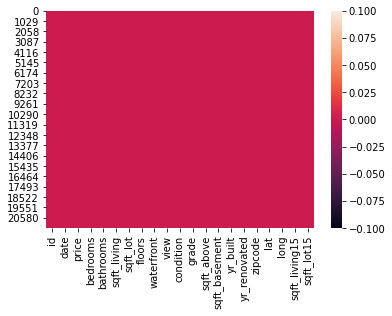

In [ ]:
sns.heatmap(df.isnull()) #no missing data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


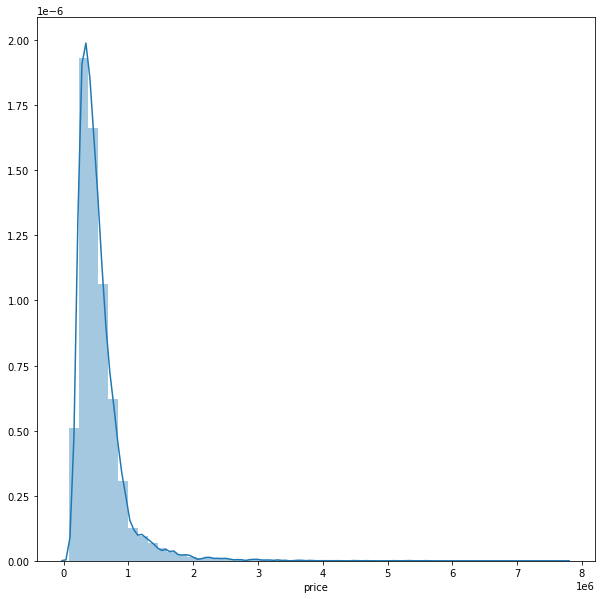

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'])

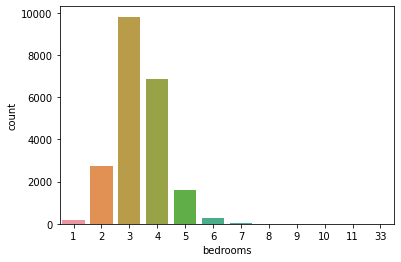

In [ ]:
sns.countplot(df['bedrooms']) #majority have 2-5 bedrooms

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

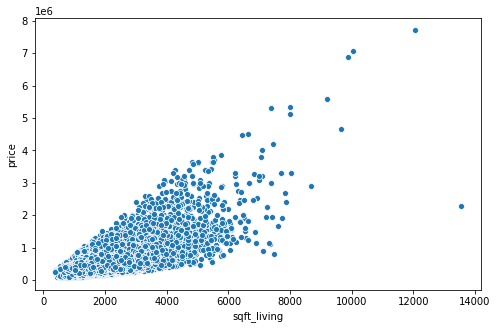

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living',y='price',data=df)

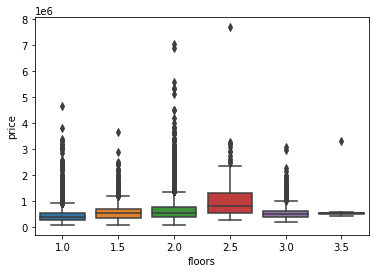

In [ ]:
sns.boxplot(x='floors',y='price',data=df)

# Feature Engineering

In [ ]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
y = lambda dates : dates.year

In [ ]:
df['year'] = df['date'].apply(y)

In [ ]:
df['month'] = df['date'].apply(lambda dates : dates.month)

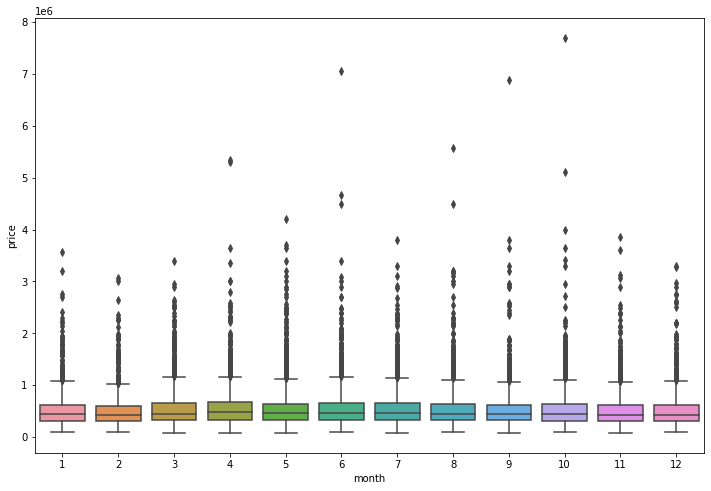

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=df)

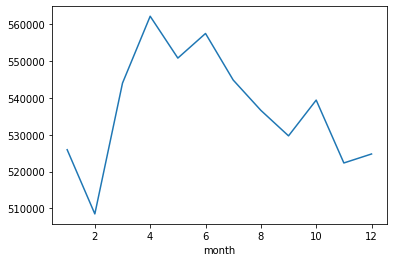

In [ ]:
df.groupby('month').mean()['price'].plot()

In [ ]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
# df.head(2)

#Data Preprocessing and Train-Test Split (ML/DL)
--> note that neural networks take in arrays. hence .values is important


In [ ]:
df = df.drop('date',axis=1)
X = df.drop('price',axis=1).values

In [ ]:
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# now we do scaling. and we always do it post split, on the training set to prevent 
#data leakage.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
#input neurons = no. of incoming features (columns of the matrix/2D array)
X_train.shape # hence 19 input layer neurons

(15117, 19)

# adding layers one by one

In [ ]:
model.add(Dense(19,activation='relu'))

In [ ]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1)) #might be overkill but we'll check with validation data

In [ ]:
model.compile(optimizer='adam',loss='mse') #since y -> price -> continuous value, mse is a good loss function. adam is a modified grad. descent.

In [ ]:
model.fit(x=X_train,y=y_train,batch_size=128,validation_data=(X_test,y_test),epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 430246330368.0000 - val_loss: 418949070848.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429333708800.0000 - val_loss: 415472713728.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 413313368064.0000 - val_loss: 376751554560.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 327799799808.0000 - val_loss: 238805565440.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 168415969280.0000 - val_loss: 106404708352.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 101073387520.0000 - val_loss: 94634680320.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 96862617600.0000 - val_loss: 92891299840.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94998437888.0000 - val_loss: 91125481472.0000
Epoch 9/400
119/119 [

# Model Evaluation and Predictions

In [ ]:
losses = pd.DataFrame(model.history.history)

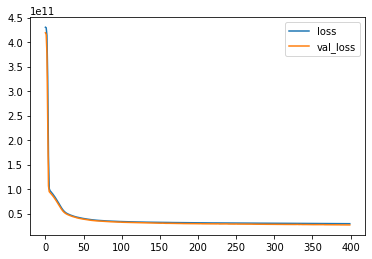

In [ ]:
losses.plot() #ideal/desired response. since the validation loss ain't increasing.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [ ]:
y_p = model.predict(X_test)

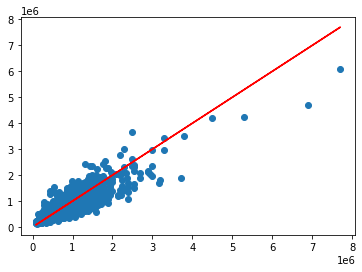

In [ ]:
plt.scatter(y_test,y_p)
plt.plot(y_test,y_test,'r') #good fair predictions we can say

In [ ]:
print(f"1. The mean absolute error is - {mean_absolute_error(y_test,y_p)}")
print(f"2. The mean squared error is - {mean_squared_error(y_test,y_p)}")
print(f"3. The roor mean squared error is -{np.sqrt(mean_squared_error(y_test,y_p))} ")
print(f"4. The explained varience (best value = 1) is - {explained_variance_score(y_test,y_p)}")

1. The mean absolute error is - 100940.98638961227
2. The mean squared error is - 26750775420.230263
3. The roor mean squared error is -163556.64284959587 
4. The explained varience (best value = 1) is - 0.7983083187855454


#Predicting the price for a new house

In [ ]:
singlehouse= df.drop('price',axis=1).iloc[0].values.reshape(-1,19)
singlehouse = scaler.transform(singlehouse)

In [ ]:
preddiction = list(model.predict(singlehouse))

In [ ]:
preddiction

[array([276316.84], dtype=float32)]

In [ ]:
(276316.84 -221900.0	)/276316.84 #just ~19% off and that's fair prediction

0.19693638650470968

In [ ]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
